# Metadata

* Title: **Final Project Report**
* Class:    DS 5100
* Date:     May 2, 2023
* Student Name:     Naomi Ohashi
* Student Net ID:   fju4ek
* This URL: <a URL to the notebook source of this document>
* GitHub Repo URL:  https://github.com/ohashin2G/FinalProject_Montecarlo

# The Monte Carlo Module

In [ ]:
### Import class dependencies here

import pandas as pd
import numpy as np
import random

## The Die class

"""
        A die has N sides, or “faces”, and W weights, and can be rolled to select a face.
        - W defaults to 1.0 for each face but can be changed after the object is created.
        - Note that the weights are just numbers, not a normalized probability distribution.
        - The die has one behavior, which is to be rolled one or more times.
        - Note that what we are calling a “die” here can be any discrete random variable associated 
          with a stochastic process, such as using a deck of cards or flipping a coin or speaking a language.
"""

class Die(): 

    sides = []
    weights = []

        # Initializer 
    def __init__(self, sides):
        self.sides = sides
        self.weights = [1.0 for i in self.sides]
        self.die = pd.DataFrame({
            'sides': self.sides,
            'weights': self.weights
        })

        # Change the weight Method     
    def change_weight(self, face_value, new_weight):
        continuefacevalue = False
        for i in self.die.sides:
              if i == face_value:
                continuefacevalue = True

        continueweight = False
        result = type(new_weight)
        
        if result == "float":
              continueweight = True
        elif result == int:
              continueweight = True
        else: continueweight = False
         
        if continuefacevalue & continueweight:
            index = self.die.sides.index[self.die.sides == face_value].to_list()[0]
            self.die.weights[index] = new_weight
        else: print("not valid")

        # Roll the die Method
    def roll(self, n_rolls):
        results = []
        for i in range(n_rolls):
            result = self.die.sides.sample(weights=self.die.weights).values[0]
            results.append(result)
        self.results = pd.Series(results) 
        return(results)
         
        # Show Method - the die’s current set of faces and weights
    def show(self):
        return(self.die)
    
    # The Game calss

        """
        A game consists of rolling of one or more dice of the same kind one or more times.

        """

class Game():

    dice = []
    num_of_dice = 0
    playdice = pd.DataFrame({
        'roll_number': [],
        'die_number': [],
        'face_rolled': []
        })

        # Initializer
    def __init__(self, dice):
            self.dice = dice
            self.num_of_dice = len(dice)
            
    def roll(self, times): #-> list(int):
            myres = []
            count = 0
            for element in self.dice:
              count += 1
            for i in range (1, count+1):
                for j in range (1, times+1):
                    myres.append(j)
            return myres
    
        # When the roll happens - return an array of Die that did the roll
    def diceroll(self, times): # -> list(int):
            myres = []
            count = 0
            for element in self.dice:
              count += 1
            for i in range (1, count+1):
                for j in range (1, times+1):
                    myres.append(i)
            return myres
    
        # When the roll happens - return an array of the results of the die rolls
    def roll_dice(self, times: int): # -> list(str | float):
            results = []
            for die in self.dice:
                results.extend(die.roll(times))
            return(results)
    
            # Play the game.  When this is called it sets die, roll and face values. 
    
    def play(self, times):
              #die_number = []
              die_number = self.diceroll(times)
              #roll_number = []
              roll_number = self.roll(times)
              #face_rolled = []
              face_rolled = self.roll_dice(times)
          
              self.playdice = pd.DataFrame({
                  'roll_number': roll_number,
                  'die_number': die_number,
                  'face_rolled': face_rolled
              }).set_index('roll_number')


            # Show the results of the game.  This can return NARROW or WIDE results. 
    def show(self,df_type):
            continueshow = False
            if df_type == "NARROW":
                continueshow = True
            elif df_type == "WIDE":
                continueshow = True
            if not continueshow:
                print("invalid")
                return 
            if df_type == "NARROW" or df_type == "WIDE":            
                #print("showing NARROW")
                NARROW = self.playdice.set_index('die_number', append = True)
                #NARROW = pd.DataFrame(dict(self.playdice)).groupby(['die_number', 'roll_number']).face_rolled.count().to_frame('face_rolled')            
                return NARROW if df_type == "NARROW" else NARROW.unstack("die_number")


            # The Analyzer class
                """
                An analyzer takes the results of a single game and computes various descriptive statistical properties about it. These properties results are available as attributes of an Analyzer object.
                """

from pandas.core.groupby import groupby

class Analyzer():
 
        #Initializer - Takes a game object as its input parameter
    def __init__(self, game=Game) -> None:
        self.game = game
        self.die_face_type = type(self.game.dice)
        self.combo_df = None
        self.jackpot_df = None
        self.face_counts_per_roll_df = None
        self.num_of_dice = game.num_of_dice 
        #print('num game of dice = ', game.num_of_dice)     

        #Jackpot - Compute how many times a roll resulted in all faces being the same.
    def jackpot(self):
     
        occurences_df = self.game.show('NARROW') \
            .reset_index() \
            .groupby(by=['roll_number', 'face_rolled']) \
            .size() \
            .to_frame('occurences')
        
        self.jackpot_df = occurences_df[occurences_df['occurences'] == self.num_of_dice]
        return self.jackpot_df.shape[0]
       
        #Combo - Compute how many combination types of faces were rolled and their counts.
    def combo(self):
        """
        get distinct list of WIDE results with a list
        """       
        self.combo_df = self.game.show('NARROW') \
            .groupby(by=['roll_number']) \
            .agg({'face_rolled': set}) \
            .astype({'face_rolled': 'str'}) \
            .groupby('face_rolled') \
            .size() \
            .to_frame('count_row') \
            .sort_values('count_row', ascending=False)
        
      

        #Face counts per roll - Compute how many times a given face is rolled in each event
    def face_counts_per_roll(self):  
        self.face_counts_per_roll = self.game.show('NARROW') \
            .reset_index() \
            .groupby(by=['roll_number', 'face_rolled']) \
            .size().unstack('face_rolled') \
            .fillna(0)
 


# Test Module

In [ ]:
import unittest
#from montecarlo import Die, Game, Analyzer

"""
The Die class should have unit tests to test if the methods receive the correct inputs and return valid outputs.
"""

        #Checks to see if the face passed is valid; is it in the array of weights? 
class DieTestSuite(unittest.TestCase):
    def test_1_change_weight_method(self):
        sides = [1,2,3,4,5,6]
        die = Die(sides)
        die.change_weight(1, 2)
        self.assertEqual(die.die.weights[1], 1.0)

    def test_2_roll_method(self):
        #Checks to see if the weight is valid; is it a float? Can it be converted to one?
        sides = [1,2,3,4,5,6]
        die = Die(sides)
        results = die.roll(1) 
        self.assertNotEqual(results, '')

    def test_3_show_method(self):
        #Checks to see if the weight is valid; is it a float? Can it be converted to one?
            sides = [1,2,3,4,5,6]
            die = Die(sides)
            die.roll(1) 
            result = die.show()
            self.assertTrue(result.count)

        
class GameTestSuite(unittest.TestCase):
        
        """
        The Game class should have unit tests to test if the methods 
        receive the correct inputs and return valid outputs.
        """
        sides = [1,2,3,4,5,6]
        die = Die(sides)
        die2 = Die(sides)
        List = [die, die2]
        g1 = Game(List)
    
        def test_1_game_roll_method(self):
            self.assertTrue(self.g1.roll(1))
            #Checks to see if how many times the dice should be rolled.
    
        def test_2_dice_roll_method(self):
            #Checks to see if how many times the dice should be rolled per roll.
            self.assertTrue(self.g1.diceroll(1))
    
        def test_roll_dice_method(self):
            #Checks to see if how many times the die rolls.
            self.assertTrue(self.g1.roll_dice(1))
    
        def test_play_method(self):
            #Checks to see if how many times the die rolled.
            self.assertFalse(self.g1.play(1))  
    
        def test_show_method(self):
            #Checks to see if it passed the private dataframe to the user.
            test = self.g1.show('NARROW')
            pd.testing.assert_frame_equal(test, self.g1.show('NARROW'))
            #self.assertFalse(self.g1.show('NARROW').all())        

class AnalyzerTestSuite(unittest.TestCase):

        """
        The Analyzer class should have unit tests to test if the methods 
        receive the correct inputs and return valid outputs.
        """

        sides = [1,2,3,4,5,6]
        die = Die(sides)
        die2 = Die(sides)
        List = [die, die2]
        g1 = Game(List)
        A1 = Analyzer(g1)

        def test_jackpot_method(self):
        #Check to see if it returns an integer for the number times to the user
            self.assertFalse(self.A1.jackpot())

        def test_combo_method(self):
        #Check to see if Combinations were sorted and saved as a multicolumned index.    
            self.assertFalse(self.A1.combo())

        def test_face_counts_method(self):
        #Check to see if The dataframe has an index of the roll number and face values as columns.    
            self.assertFalse(self.A1.face_counts_per_roll())

    
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


In [ ]:
#!ls
!python montecarlo_test.py 2> montecarlo_results.txt

# Test Results

In [ ]:
PS C:\Repos\ds5100_repos\Final Project> & C:/Users/n_oha/AppData/Local/Programs/Python/Python311/python.exe "c:/Repos/ds5100_repos/Final Project/montecarlo_test.py"
test_combo_method (__main__.AnalyzerTestSuite.test_combo_method) ... ok
test_face_counts_method (__main__.AnalyzerTestSuite.test_face_counts_method) ... ok
test_jackpot_method (__main__.AnalyzerTestSuite.test_jackpot_method) ... ok
test_1_change_weight_method (__main__.DieTestSuite.test_1_change_weight_method) ... c:\Repos\ds5100_repos\Final Project\montecarlo.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.die.weights[index] = new_weight
ok
test_2_roll_method (__main__.DieTestSuite.test_2_roll_method) ... ok
test_3_show_method (__main__.DieTestSuite.test_3_show_method) ... ok
test_1_game_roll_method (__main__.GameTestSuite.test_1_game_roll_method) ... ok
test_2_dice_roll_method (__main__.GameTestSuite.test_2_dice_roll_method) ... ok
test_play_method (__main__.GameTestSuite.test_play_method) ... ok
test_roll_dice_method (__main__.GameTestSuite.test_roll_dice_method) ... ok
test_show_method (__main__.GameTestSuite.test_show_method) ... ok

----------------------------------------------------------------------
Ran 11 tests in 0.079s

OK
PS C:\Repos\ds5100_repos\Final Project>

# Scenarios

Code blocks with your scenarios and their outputs. 

These should have appropriate import statements even though the code is now in the same notebook as the classes it calls. 

In [59]:
# Import dependencies here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from montecarlo.montecarlo.py import Die, Game, Analyzer

In [60]:
ls

frequency of letters.csv  montecarlo_results.txt     setup.py
montecarlo/               montecarlo_test.py
montecarlo_demo.ipynb     Project_Package.egg-info/


## Scenario 1: A 2-headed coin

In [ ]:
    ## 1. Create a fair coin (with faces H and T) and one unfair coin, in which one of the faces has a weight of 5 and the others 1.
coin_faces = ['H', 'T']
fair_coin = Die(coin_faces)
unfair_coin = Die(coin_faces)
unfair_coin.change_weight('H', 5)

In [63]:
    ## 2. Play a game of 10000 rolls with all fair dice.
S1n = 1000
G1 = Game([fair_coin, fair_coin, fair_coin])
G1.play(S1n)
G1.show('NARROW')

,,face_rolled
roll_number,die_number,
1,1,H
2,1,T
3,1,H
4,1,H
5,1,H
...,...,...
996,3,T
997,3,T
998,3,T


In [64]:
    ##  3. Play a game of 1000 flips with two unfair dice and one fair die.
G2 = Game([fair_coin, fair_coin, unfair_coin])
G2.play(S1n)
G2.show('NARROW')

,,face_rolled
roll_number,die_number,
1,1,T
2,1,H
3,1,T
4,1,H
5,1,H
...,...,...
996,3,H
997,3,H
998,3,H


In [65]:
    ## 4. For each game, use an Analyzer object to determine the relative frequency of jackpots - getting either all Hs or all Ts.
A1 = Analyzer(G2)
A1.jackpot()

256

In [66]:
    ## 5. Compute relative frequency as the number of jackpots over the total number of rolls.
unfair = A1.jackpot()/1000

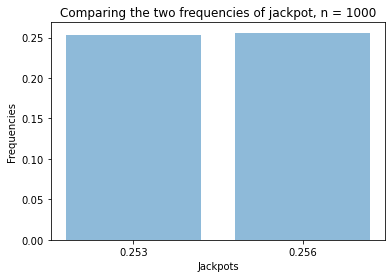

In [73]:
    ## 6. Show your results, comparing the two relative frequencies, in a simple bar chart. (**Works on VS code and Google Colab)
plt.style.use('_mpl-gallery')
A2 = Analyzer(G1)
A2.jackpot()
fair = A2.jackpot()/1000

objects = [fair, unfair]
y_frequencies = np.arange(len(objects))
jackpot_results = [fair, unfair]

plt.bar(y_frequencies, jackpot_results, align='center', alpha=0.5)
plt.xticks(y_frequencies, objects)
plt.xlabel('Jackpots')
plt.ylabel('Frequencies')
plt.title('Comparing the two frequencies of jackpot, n = 1000')
plt.show()

## Scenario 2: A 6-sided die

In [ ]:
## 1. Create a fair die and two unfair dice, all of six sides with the faces 1 through 6. (**Works on VS code and Google Colab)
die_faces = [1,2,3,4,5,6]
fair_die = Die(die_faces)
Type_1_unfair = Die(die_faces)
Type_1_unfair.change_weight(6,5)
Type_2_unfair = Die(die_faces)
Type_2_unfair.change_weight(1,5)

In [74]:
## 2. Play a game of 10000 rolls with 5 fair dice
S2n = 10000

G3 = Game([fair_die, fair_die, fair_die, fair_die, fair_die])
G3.play(S2n)
G3.show('NARROW')

,,face_rolled
roll_number,die_number,
1,1,4
2,1,5
3,1,1
4,1,3
5,1,1
...,...,...
9996,5,6
9997,5,5
9998,5,2


In [75]:
## 3. Play a game of 10000 rolls with 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice.
G4 = Game([Type_1_unfair, Type_1_unfair, Type_2_unfair, fair_die, fair_die])
G4.play(S2n)
G4.show('NARROW')

,,face_rolled
roll_number,die_number,
1,1,6
2,1,6
3,1,6
4,1,2
5,1,5
...,...,...
9996,5,5
9997,5,1
9998,5,5


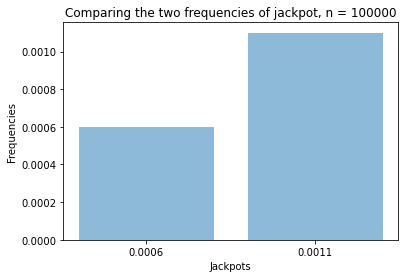

In [71]:
## 4. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.
A2 = Analyzer(G3)
A2.jackpot()
fair_jackpot = A2.jackpot()/10000

A2 = Analyzer(G4)
A2.jackpot()
unfair_jackpot = A2.jackpot()/10000

objects = [fair_jackpot, unfair_jackpot]
y_frequencies = np.arange(len(objects))
jackpot_results = [fair_jackpot, unfair_jackpot]

plt.bar(y_frequencies, jackpot_results, align='center', alpha=0.5)
plt.xticks(y_frequencies, objects)
plt.xlabel('Jackpots')
plt.ylabel('Frequencies')
plt.title('Comparing the two frequencies of jackpot, n = 100000')
plt.show()

<AxesSubplot:xlabel='face_rolled'>

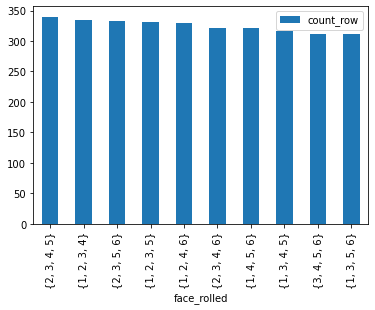

In [76]:
## 5. Compute 10 most frequent combinations of faces for each game. Plot each of these as bar charts.
### Game 3 - fair jackpots
A2_G3 = Analyzer(G3)
A2_G3.combo()
A2_G3.combo_df.sort_values(by = ['count_row'], ascending=False).head(10)

df = A2_G3.combo_df.sort_values(by = ['count_row'], ascending=False).head(10)
df.plot.bar(x=None, y=None)

<AxesSubplot:xlabel='face_rolled'>

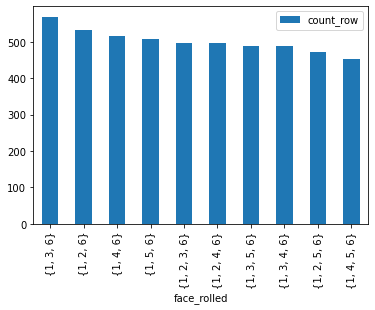

In [77]:
### Game 4 - Unfair jackpots
A2_G4 = Analyzer(G4)
A2_G4.combo()
A2_G4.combo_df.sort_values(by = ['count_row'], ascending=False).head(10)

df2 = A2_G4.combo_df.sort_values(by = ['count_row'], ascending=False).head(10)
df2.plot.bar(x=None, y=None)

## Scenario 3: Letters of the Roman Alpha

In [79]:
## 1. Create a "die" of letters from a to z with weights based on their frequency of usage.
import string
for letters in string.ascii_lowercase:
    print(letters, end=" ")

letters = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
Lweights = "./frequency of letters.csv"
die_letters = Die(letters)
die_letters.change_weight(letters, Lweights)

a b c d e f g h i j k l m n o p q r s t u v w x y z not valid


In [80]:
## 2. Play a game involving 5 of these dice with 1000 rolls
S3n = 1000
G5 = Game([die_letters, die_letters, die_letters, die_letters, die_letters])
G5.play(S3n)
FindWords = G5.show('WIDE')
print(FindWords)

            face_rolled            
die_number            1  2  3  4  5
roll_number                        
1                     a  c  z  u  f
2                     w  h  m  v  u
3                     a  a  i  o  o
4                     n  m  f  n  f
5                     w  s  v  p  s
...                 ... .. .. .. ..
996                   v  w  x  t  l
997                   p  v  i  n  y
998                   e  a  a  i  p
999                   q  v  w  p  p
1000                  t  v  n  e  x

[1000 rows x 5 columns]


In [81]:
## 3. How many combos can you that look like actual English words?
# None found

## 4. Based on your eye count, what is the relative frequency of these words versus the rest?
# Based on my eye count, the relative frequency of the words vs. the rest is close to zero.

# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [82]:
!ls -lR ../Project_Package/

../Project_Package/:
total 100
-rw-r--r-- 1 fju4ek users   263 May  2 23:22 frequency of letters.csv
drwxr-sr-x 4 fju4ek users  2048 May  5 20:50 montecarlo
-rw-r--r-- 1 fju4ek users 68812 May  5 21:57 montecarlo_demo.ipynb
-rw-r--r-- 1 fju4ek users   202 May  5 21:47 montecarlo_results.txt
-rw-r--r-- 1 fju4ek users  2992 May  2 20:49 montecarlo_test.py
drwxr-sr-x 2 fju4ek users  2560 May  5 19:33 Project_Package.egg-info
-rw-r--r-- 1 fju4ek users   349 May  5 19:27 setup.py

../Project_Package/montecarlo:
total 20
-rw-r--r-- 1 fju4ek users  115 May  2 23:29 __init__.py
-rw-r--r-- 1 fju4ek users 6494 May  5 20:50 montecarlo.py
drwxr-sr-x 2 fju4ek users 1024 May  2 19:57 __pycache__

../Project_Package/montecarlo/__pycache__:
total 16
-rw-r--r-- 1 fju4ek users  248 May  2 19:57 __init__.cpython-38.pyc
-rw-r--r-- 1 fju4ek users 4771 May  2 19:57 montecarlo.cpython-38.pyc

../Project_Package/Project_Package.egg-info:
total 20
-rw-r--r-- 1 fju4ek users   1 May  5 19:33 dependency_links.txt

# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [83]:
print(open('setup.py', 'r').read())

from setuptools import setup, find_packages

setup(
    name='Project_Package',
    version='1.0.0',
    url='https://github.com/ohashin2G/FinalProject_Montecarlo',
    author='Naomi Ohashi',
    author_email='ohashin2@gmail.com',
    description='Mote Carlo Simulator',
    packages=find_packages(),    
    install_requires=['click'],
)


In [84]:
pip install -e .

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///sfs/qumulo/qhome/fju4ek/Documents/MSDS/DS5100/DS5100-2023-01-fju4ek/lessons/M99/Project_Package
  Attempting uninstall: Project-Package
    Found existing installation: Project-Package 1.0.0
    Uninstalling Project-Package-1.0.0:
      Successfully uninstalled Project-Package-1.0.0
  Running setup.py develop for Project-Package
Note: you may need to restart the kernel to use updated packages.
